In [1]:
!pip install mowl-borg


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mowl
mowl.init_jvm("10g")

In [7]:
from mowl.datasets.base import PathDataset
#dataset = PathDataset("muts_train.owl",validation_path="muts_valid.owl",
                 #testing_path="muts_test.owl")
dataset=PathDataset("data/MAPK_mutants.owl")
training_axioms = dataset.ontology.getAxioms()


In [8]:
from mowl.reasoning.base import MOWLReasoner
from org.semanticweb.HermiT import Reasoner

reasoner = Reasoner.ReasonerFactory().createReasoner(dataset.ontology)
reasoner.precomputeInferences()

mowl_reasoner = MOWLReasoner(reasoner)
classes_to_infer_over = list(dataset.ontology.getClassesInSignature())

subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes_to_infer_over)
equivalence_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes_to_infer_over)
disjointness_axioms = mowl_reasoner.infer_disjoint_class_axioms(classes_to_infer_over)

total_inferred_axioms = len(subclass_axioms) + len(equivalence_axioms) + len(disjointness_axioms)

print("Total number of inferred axioms:", total_inferred_axioms)

with open("hermit_reasoner_results.txt", "w") as file:
    file.write("Subclass axioms:\n")
    for axiom in subclass_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nEquivalence axioms:\n")
    for axiom in equivalence_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nDisjointness axioms:\n")
    for axiom in disjointness_axioms:
        file.write(str(axiom) + "\n")


INFO:root:Number of inferred axioms: 58.
INFO:root:Number of inferred axioms: 20.
INFO:root:Number of inferred axioms: 20.


Total number of inferred axioms: 98


In [9]:
from org.semanticweb.owlapi.apibinding import OWLManager

manager = OWLManager.createOWLOntologyManager()
ontology = manager.createOntology()

ontology.getClassesInSignature()

from mowl.owlapi import OWLAPIAdapter

adapter = OWLAPIAdapter()
owl_manager = adapter.owl_manager # Instance of org.semanticweb.owlapi.apibinding.OWLManager
data_factory = adapter.data_factory # Equivalent to owl_manager.getOWLDataFactory()

In [10]:
from org.semanticweb.elk.owlapi import ElkReasonerFactory
from java.util import HashSet

reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)

mowl_reasoner = MOWLReasoner(reasoner)

reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)
mowl_reasoner = MOWLReasoner(reasoner)

classes = dataset.ontology.getClassesInSignature()
subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes)
equivalent_class_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes)

adapter = OWLAPIAdapter()
manager = adapter.owl_manager

axioms = HashSet()
axioms.addAll(subclass_axioms)
axioms.addAll(equivalent_class_axioms)

manager.addAxioms(dataset.ontology, axioms)

INFO:root:Number of inferred axioms: 58.
INFO:root:Number of inferred axioms: 20.


<java object 'org.semanticweb.owlapi.model.parameters.ChangeApplied'>

In [11]:
from mowl.owlapi import OWLAPIAdapter

manager = OWLAPIAdapter().owl_manager

# Initialize a counter variable
total_axioms = 0

for ax in subclass_axioms:
    manager.addAxiom(dataset.ontology, ax)
    total_axioms += 1

for ax in equivalent_class_axioms:
    manager.addAxiom(dataset.ontology, ax)
    total_axioms += 1

'''for ax in classes:
    manager.addAxiom(dataset.ontology, ax)
    total_axioms += 1
'''
# Print the total count of axioms added
print("Total axioms added:", total_axioms)


with open("elk_reasoner_results.txt", "w") as file:
    file.write("Subclass axioms:\n")
    for axiom in subclass_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nEquivalence axioms:\n")
    for axiom in equivalence_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nDisjointness axioms:\n")
    for axiom in disjointness_axioms:
        file.write(str(axiom) + "\n")

Total axioms added: 78


# Syntactic Embeddings

In [12]:
from mowl.corpus import extract_axiom_corpus
corpus = extract_axiom_corpus(dataset.ontology)
len(corpus)

INFO:root:Generating axioms corpus


1142

In [13]:
for s in corpus[:10]:
    print(s)

http://www.reactome.org/biopax/88/9652817#UnificationXref45 http://www.biopax.org/release/biopax-level3.owl#db "UniProt"^^http://www.w3.org/2001/XMLSchema#string
http://www.reactome.org/biopax/88/9652817#PublicationXref2 http://www.biopax.org/release/biopax-level3.owl#author "Pugh, Trevor J"^^http://www.w3.org/2001/XMLSchema#string
http://www.reactome.org/biopax/88/9652817#BiochemicalReaction1 http://www.biopax.org/release/biopax-level3.owl#comment "Authored: Rothfels, Karen, 2019-10-25"^^http://www.w3.org/2001/XMLSchema#string
http://www.reactome.org/biopax/88/9652817#PublicationXref2 http://www.biopax.org/release/biopax-level3.owl#author "Hidalgo-Miranda, Alfredo"^^http://www.w3.org/2001/XMLSchema#string
http://www.reactome.org/biopax/88/9652817#Provenance1 http://www.biopax.org/release/biopax-level3.owl#comment "http://www.reactome.org"^^http://www.w3.org/2001/XMLSchema#string
http://www.reactome.org/biopax/88/9652817#SequenceSite31 Type http://www.biopax.org/release/biopax-level3.o

## Projecting ontologies into graphs
Ontologies contain adjacency information that can be projected into a graph. There are different ways of generating such graphs:

In [14]:
from mowl.projection import CategoricalProjector

projector = CategoricalProjector()
cat_edges = projector.project(dataset.ontology)

  0%|                                                                                         | 0/2050 [00:00<?, ?it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


  2%|█▍                                                                              | 38/2050 [00:00<00:28, 70.66it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#SmallMoleculeReference>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
  5%|███▋                                                                           | 96/2050 [00:00<00:11, 166.33it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom 

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
  6%|████▉                                                                         | 131/2050 [00:01<00:09, 206.70it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: D

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
  9%|██████▉                                                                       | 181/2050 [00:01<00:12, 152.11it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 11%|████████▉                                                                     | 234/2050 [00:01<00:09, 188.44it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


 14%|███████████                                                                   | 291/2050 [00:01<00:08, 216.11it/s]

No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#BiochemicalReaction>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unkn

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 15%|███████████▉                                                                  | 315/2050 [00:02<00:08, 205.16it/s]

process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


 18%|██████████████▍                                                               | 379/2050 [00:02<00:06, 244.45it/s]

process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
No edges found for EquivalentClasses

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 21%|████████████████▋                                                             | 439/2050 [00:02<00:06, 253.05it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#SequenceModificationVocabulary>)
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: FunctionalDataProperty
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#Protein>)
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#RelationshipTypeVocabulary>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom typ

 26%|████████████████████▍                                                         | 536/2050 [00:02<00:04, 354.06it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: D

 29%|██████████████████████▎                                                       | 585/2050 [00:02<00:03, 379.51it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: SubDataPropertyOf
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


 33%|█████████████████████████▍                                                    | 669/2050 [00:03<00:04, 312.43it/s]

process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: Dat

 34%|██████████████████████████▊                                                   | 704/2050 [00:03<00:04, 304.70it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion


 40%|██████████████████████████████▊                                               | 810/2050 [00:03<00:03, 380.54it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataP

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 42%|████████████████████████████████▍                                             | 853/2050 [00:03<00:03, 337.86it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type

 43%|█████████████████████████████████▉                                            | 891/2050 [00:03<00:03, 307.26it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


 45%|███████████████████████████████████▏                                          | 925/2050 [00:04<00:06, 169.29it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 46%|████████████████████████████████████▏                                         | 951/2050 [00:04<00:06, 175.51it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#SequenceInterval>)
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#ProteinReference>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
p

 48%|█████████████████████████████████████▏                                        | 977/2050 [00:04<00:05, 185.79it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 50%|██████████████████████████████████████▌                                      | 1025/2050 [00:04<00:04, 237.78it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type

 53%|████████████████████████████████████████▉                                    | 1089/2050 [00:04<00:03, 261.19it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 56%|███████████████████████████████████████████▍                                 | 1157/2050 [00:05<00:03, 285.82it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


 60%|██████████████████████████████████████████████▎                              | 1234/2050 [00:05<00:02, 294.17it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#PathwayStep>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#PublicationXref>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
proce

 65%|██████████████████████████████████████████████████▏                          | 1337/2050 [00:05<00:01, 374.27it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#RelationshipXref>)
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unkn

 67%|███████████████████████████████████████████████████▊                         | 1379/2050 [00:05<00:01, 382.37it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#SequenceSite>)
process_axiom: Unknown 

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 69%|█████████████████████████████████████████████████████▎                       | 1419/2050 [00:05<00:01, 351.64it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 71%|██████████████████████████████████████████████████████▋                      | 1456/2050 [00:06<00:01, 319.64it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#Provenance>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#SmallMolecule>)
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: 

 73%|████████████████████████████████████████████████████████                     | 1494/2050 [00:06<00:01, 322.64it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion


 76%|██████████████████████████████████████████████████████████▍                  | 1557/2050 [00:06<00:01, 268.98it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: Dat

 79%|████████████████████████████████████████████████████████████▊                | 1619/2050 [00:06<00:01, 257.69it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataP

 83%|███████████████████████████████████████████████████████████████▊             | 1698/2050 [00:06<00:01, 313.47it/s]

process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: Da

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 85%|█████████████████████████████████████████████████████████████████▋           | 1748/2050 [00:07<00:00, 363.27it/s]INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
 88%|███████████████████████████████████████████████████████████████████▍         | 1795/2050 [00:07<00:00, 359.91it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: SubDataPropertyOf
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataProp

INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..
INFO:root:owl:Thing existing in union. Simplifying to owl:Thing..


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


 90%|█████████████████████████████████████████████████████████████████████▍       | 1847/2050 [00:07<00:00, 245.64it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion


java.lang.NullPointerException: java.lang.NullPointerException

### Taxonomy projector (Hierarchy only)

In [15]:
from mowl.projection import TaxonomyProjector, TaxonomyWithRelationsProjector, DL2VecProjector, OWL2VecStarProjector

In [16]:
tax_edges = TaxonomyProjector().project(dataset.ontology)

for edge in tax_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

biopax-level3.owl#BindingFeature	subclassof	biopax-level3.owl#EntityFeature
biopax-level3.owl#BioSource	subclassof	biopax-level3.owl#UtilityClass
biopax-level3.owl#BioSource	subclassof	owl#Thing
biopax-level3.owl#BiochemicalPathwayStep	subclassof	biopax-level3.owl#PathwayStep
biopax-level3.owl#BiochemicalReaction	subclassof	biopax-level3.owl#Conversion
biopax-level3.owl#BiochemicalReaction	subclassof	biopax-level3.owl#Entity
biopax-level3.owl#BiochemicalReaction	subclassof	biopax-level3.owl#Interaction
biopax-level3.owl#BiochemicalReaction	subclassof	owl#Thing
biopax-level3.owl#Catalysis	subclassof	biopax-level3.owl#Control
biopax-level3.owl#Catalysis	subclassof	biopax-level3.owl#Entity
biopax-level3.owl#Catalysis	subclassof	owl#Thing
biopax-level3.owl#Catalysis	subclassof	biopax-level3.owl#Interaction
biopax-level3.owl#CellVocabulary	subclassof	biopax-level3.owl#ControlledVocabulary
biopax-level3.owl#CellularLocationVocabulary	subclassof	biopax-level3.owl#ControlledVocabulary
biopax-l

In [45]:
# Auxiliary method to create plots
def nx_network(edges):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.DiGraph()
    for edge in edges:
        src = edge.src.split("/")[-1]
        dst = edge.dst.split("/")[-1]
        G.add_edge(src, dst)
    #nx draw with custom colors
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node:node for node in G.nodes()})
    #nx.draw(G, with_labels=True)
    plt.show()

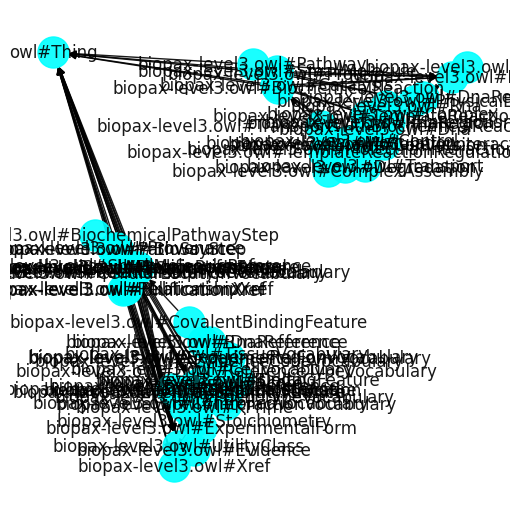

In [48]:
nx_network(tax_edges)

### DL2Vec projector

In [28]:
dl2vec_proj = DL2VecProjector(bidirectional_taxonomy=True)
d2v_edges = dl2vec_proj.project(dataset.ontology, with_individuals=True)

for edge in d2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

9652817#ProteinReference5	biopax-level3.owl#organism	9652817#BioSource1
9652817#Protein2	biopax-level3.owl#feature	9652817#FragmentFeature1
9652817#ModificationFeature3	biopax-level3.owl#featureLocation	9652817#SequenceSite3
biopax-level3.owl#PathwayStep	subclassof	biopax-level3.owl#UtilityClass
biopax-level3.owl#UtilityClass	superclassof	biopax-level3.owl#PathwayStep
9652817#SequenceModificationVocabulary5	biopax-level3.owl#xref	9652817#UnificationXref22
biopax-level3.owl#RelationshipXref	subclassof	owl#Thing
owl#Thing	superclassof	biopax-level3.owl#RelationshipXref
biopax-level3.owl#Catalysis	biopax-level3.owl#controller	biopax-level3.owl#PhysicalEntity
9652817#SequenceInterval4	biopax-level3.owl#sequenceIntervalEnd	9652817#SequenceSite14
9652817#RelationshipXref10	biopax-level3.owl#relationshipType	9652817#RelationshipTypeVocabulary2
9652817#Protein4	biopax-level3.owl#feature	9652817#ModificationFeature5
9652817#Protein10	biopax-level3.owl#feature	9652817#FragmentFeature9
biopax-lev

In [52]:
# Auxiliary method to create plots
def nx_network(edges):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.DiGraph()
    for edge in edges:
        src = edge.src.split("/")[-1]
        dst = edge.dst.split("/")[-1]
        G.add_edge(src, dst)
    #nx draw with custom colors
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node:node for node in G.nodes()})
    #nx.draw(G, with_labels=True)
    plt.show()

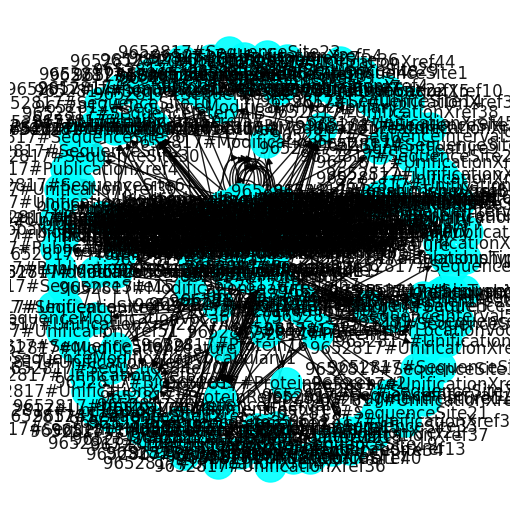

In [53]:
nx_network(d2v_edges)


### OWL2Vec* projector

In [20]:
owl2vec_proj = OWL2VecStarProjector(bidirectional_taxonomy=True)
o2v_edges = owl2vec_proj.project(dataset.ontology)

for edge in o2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

scala.MatchError: scala.MatchError: List(<http://www.biopax.org/release/biopax-level3.owl#SmallMoleculeReference>) (of class scala.collection.immutable.$colon$colon)

In [34]:
nx_network(o2v_edges)


KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

# Comparison of edges

In [25]:
# Assuming you already have the edges generated for DL2Vec, Owl2Vec, and projector's taxonomy

# Normalize edges (assuming you have the edges stored in lists named dl2vec_edges, owl2vec_edges, and projector_edges)
#d2v_edges = [(edge.src.split("/")[-1], edge.rel.split("/")[-1], edge.dst.split("/")[-1]) for edge in d2v_edges]
#normalized_owl2vec_edges = [(edge.src.split("/")[-1], edge.rel.split("/")[-1], edge.dst.split("/")[-1]) for edge in owl2vec_edges]
#tax_edges = [(edge.src.split("/")[-1], edge.rel.split("/")[-1], edge.dst.split("/")[-1]) for edge in tax_edges]

# Compare edges
# Check if edges are identical
d2v_unique_edges = set(d2v_edges) - set(tax_edges)
#owl2vec_unique_edges = set(normalized_owl2vec_edges) - set(normalized_dl2vec_edges) - set(normalized_projector_edges)
projector_unique_edges = set(tax_edges) - set(d2v_edges) #- set(normalized_owl2vec_edges)

print("Unique edges in DL2Vec:", len(d2v_unique_edges), d2v_unique_edges)
#print("Unique edges in Owl2Vec:", owl2vec_unique_edges)
print("Unique edges in Projector:", projector_unique_edges)

# You can perform further analysis or comparison based on your specific requirements


Unique edges in DL2Vec: 429 {('9652817#Protein13', 'biopax-level3.owl#feature', '9652817#FragmentFeature11'), ('9652817#Protein3', 'biopax-level3.owl#xref', '9652817#UnificationXref13'), ('9652817#ModificationFeature10', 'biopax-level3.owl#modificationType', '9652817#SequenceModificationVocabulary3'), ('biopax-level3.owl#TemplateReaction', 'biopax-level3.owl#participant', 'biopax-level3.owl#PhysicalEntity'), ('9652817#Protein2', 'biopax-level3.owl#xref', '9652817#UnificationXref10'), ('9652817#Catalysis1', 'biopax-level3.owl#xref', '9652817#RelationshipXref11'), ('9652817#Protein10', 'biopax-level3.owl#dataSource', '9652817#Provenance1'), ('9652817#SequenceModificationVocabulary1', 'biopax-level3.owl#xref', '9652817#UnificationXref8'), ('9652817#ModificationFeature6', 'biopax-level3.owl#modificationType', '9652817#SequenceModificationVocabulary3'), ('9652817#ModificationFeature2', 'biopax-level3.owl#featureLocation', '9652817#SequenceSite2'), ('9652817#ProteinReference7', 'biopax-level

## Embedding with Random Walks


In [30]:
from mowl.walking import DeepWalk
walker =  DeepWalk(
             10, #num_walks,
             8, #walk_length,
             0.1, #alpha
             outfile = "walks2.txt", # /optional/path/to/save/walks,
             workers = 4)

In [31]:
walker.walk(d2v_edges)

### Generating embeddings
Once the walks are generated, they can be used to generate embeddings using, for example, a Word2Vec model:

In [32]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences, vector_size=20)
w2v_model.save("my_word2vec_outfile")

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 293 word types from a corpus of 15726 raw words and 2660 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 290 unique words (98.98% of original 293, drops 3)', 'datetime': '2024-04-10T10:48:24.236704', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 15719 word corpus (99.96% of original 15726, drops 7)', 'datetime': '2024-04-10T10:48:24.237704', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.1

### Generating embeddings using a mOWL model


In [33]:
#from mowl.datasets.builtin import FamilyDataset
from mowl.models import RandomWalkPlusW2VModel
from mowl.projection import DL2VecProjector
from mowl.walking import DeepWalk

# Setup and train
model = RandomWalkPlusW2VModel(dataset)
model.set_projector(DL2VecProjector())
model.set_walker(DeepWalk(1,1))
model.set_w2v_model(min_count=1)
model.train()

# Get embeddings

class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
ind_embs = model.individual_embeddings

INFO:gensim.utils:Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2024-04-10T10:49:18.209307', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'created'}
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 69 word types from a corpus of 69 raw words and 69 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 69 unique words (100.00% of original 69, drops 0)', 'datetime': '2024-04-10T10:49:18.362729', 'gensim': '4.3.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}
INFO:gen

## Embedding with KGE methods


In [47]:
from mowl.projection.edge import Edge
triples_factory = Edge.as_pykeen(d2v_edges, create_inverse_triples = True)


In [35]:
from pykeen.models import TransE
pk_model = TransE(triples_factory=triples_factory, embedding_dim = 50, random_seed=42)

In [36]:
print(pk_model)

TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(266, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(52, 50)
    )
  )
  (weight_regularizers): ModuleList()
)


In [37]:
from mowl.kge import KGEModel

model = KGEModel(triples_factory, pk_model, epochs = 10, batch_size = 32)
model.train()
ent_embs = model.class_embeddings_dict
rel_embs = model.object_property_embeddings_dict

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/34 [00:00<?, ?batch/s]

In [38]:
print("Entity embeddings shape:", ent_embs)
print("Relation embeddings shape:", rel_embs)

Entity embeddings shape: {'http://www.reactome.org/biopax/88/9652817#ModificationFeature5': array([-0.12191024,  0.02994934, -0.0558528 ,  0.09491354, -0.18149494,
       -0.1302716 ,  0.27859485,  0.06308449, -0.12731518, -0.04886813,
        0.10122529, -0.2332809 ,  0.23517324,  0.02131744, -0.13571413,
        0.13812394,  0.0206525 ,  0.07225779,  0.13385803,  0.08764438,
        0.15916792, -0.14188477,  0.08400542,  0.02930165, -0.03966535,
        0.07337213,  0.1291812 , -0.18362324,  0.1832454 , -0.17941181,
        0.207485  ,  0.01225307,  0.11742336, -0.17489977,  0.0707678 ,
       -0.11600272, -0.1852069 ,  0.02484126, -0.19266005, -0.20358892,
        0.18673404, -0.05838276, -0.17800154,  0.18157941,  0.03897123,
       -0.18912472,  0.09188086,  0.1352659 ,  0.14584346, -0.2203856 ],
      dtype=float32), 'http://www.biopax.org/release/biopax-level3.owl#Interaction': array([-0.12237905,  0.17920001, -0.01542284, -0.0027643 ,  0.10800751,
       -0.08531351, -0.2002363

### Generating embeddings using a mOWL model


In [40]:
from mowl.models import GraphPlusPyKEENModel
from mowl.projection import DL2VecProjector
from pykeen.models import TransE
import torch as th

model = GraphPlusPyKEENModel(dataset)
model.set_projector(DL2VecProjector())
model.set_kge_method(TransE, random_seed=42)
model.optimizer = th.optim.Adam
model.lr = 0.001
model.batch_size = 32
model.train(epochs = 2)

# Get embeddings

class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
#ind_embs = model.individual_embeddings

Training epochs on cpu:   0%|          | 0/2 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

In [41]:
print("Class embeddings shape:", class_embs)
print("Role embeddings shape:", role_embs)
#print("ind embeddings shape:", ind_embs)

Class embeddings shape: {'http://www.biopax.org/release/biopax-level3.owl#BioSource': array([-0.13180283, -0.19713248,  0.11819078,  0.17920585, -0.18903698,
        0.23806058,  0.11230887,  0.20930721, -0.18944949,  0.07794521,
        0.16617946,  0.13393977, -0.06942727,  0.15165865,  0.12401099,
       -0.1531577 ,  0.12099595, -0.11544053,  0.19502974, -0.08090111,
       -0.14988095,  0.1011355 , -0.13567635, -0.10128266,  0.16113353,
        0.2172243 ,  0.08311594,  0.20625329,  0.0920884 , -0.03731306,
       -0.08601309, -0.06198473,  0.00939652, -0.02597097,  0.0572475 ,
        0.0546519 , -0.15575701, -0.1398594 ,  0.20270552, -0.09789338,
        0.1172642 ,  0.22373825, -0.2179937 ,  0.04583659,  0.05871848,
       -0.14716022, -0.05948672, -0.1093156 , -0.23180044, -0.08819524],
      dtype=float32), 'http://www.biopax.org/release/biopax-level3.owl#BiochemicalReaction': array([-0.09727868,  0.13124336,  0.12644568,  0.03548044, -0.05907562,
        0.13421354,  0.06505

# Embedding the $\mathcal{EL}$ language
# The ELDataset class


In [42]:
from mowl.datasets.el import ELDataset

ontology = dataset.ontology
el_dataset = ELDataset(
             ontology,
             class_index_dict = None,
             object_property_index_dict = None,
             extended = True)


# EL Embeddings

## Training the model



In [12]:
from mowl.datasets import PathDataset
from mowl.models.elembeddings.examples.model_ppi import ELEmPPI

dataset = PathDataset("data/MAPK_mutants.owl", "data/drug_ADME.owl","data/rafmap.owl")

model = ELEmPPI(dataset,
                embed_dim=30,
                margin=0.1,
                reg_norm=1,
                learning_rate=0.001,
                epochs=20,
                batch_size=4096,
                model_filepath=None,
                device='cpu')

model.train()

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: This axiom is not supported: 'FunctionalDataProperty(<http://www.biopax.org/release/biopax-level3.owl#title>)'.

## Evaluating the model




In [5]:
from mowl.evaluation.rank_based import ModelRankBasedEvaluator

with th.no_grad():
    model.load_best_model()
    evaluator = ModelRankBasedEvaluator(
        model,
        device = "cpu",
        eval_method = model.eval_method
    )

    evaluator.evaluate(show=True)

['http://4932.Q0010', 'http://4932.Q0017', 'http://4932.Q0032', 'http://4932.Q0045', 'http://4932.Q0050', 'http://4932.Q0055', 'http://4932.Q0060', 'http://4932.Q0065', 'http://4932.Q0070', 'http://4932.Q0075', 'http://4932.Q0080', 'http://4932.Q0085', 'http://4932.Q0092', 'http://4932.Q0105', 'http://4932.Q0110', 'http://4932.Q0115', 'http://4932.Q0120', 'http://4932.Q0130', 'http://4932.Q0140', 'http://4932.Q0142', 'http://4932.Q0143', 'http://4932.Q0160', 'http://4932.Q0182', 'http://4932.Q0250', 'http://4932.Q0255', 'http://4932.Q0275', 'http://4932.Q0297', 'http://4932.YAL001C', 'http://4932.YAL002W', 'http://4932.YAL003W', 'http://4932.YAL004W', 'http://4932.YAL005C', 'http://4932.YAL007C', 'http://4932.YAL008W', 'http://4932.YAL009W', 'http://4932.YAL010C', 'http://4932.YAL011W', 'http://4932.YAL012W', 'http://4932.YAL013W', 'http://4932.YAL014C', 'http://4932.YAL015C', 'http://4932.YAL016C-B', 'http://4932.YAL016W', 'http://4932.YAL017W', 'http://4932.YAL018C', 'http://4932.YAL

100%|██████████| 12040/12040 [03:12<00:00, 62.44it/s]

Hits@1:   0.00 Filtered:   0.00
Hits@10:  0.00 Filtered:   0.00
Hits@100: 0.02 Filtered:   0.02
MR:       2917.14 Filtered: 2860.87
AUC:      0.52 Filtered:   0.53
Evaluation finished. Access the results using the "metrics" attribute.


In [7]:
print(evaluator.metrics)

{'hits@1': 0.0, 'fhits@1': 0.0, 'hits@10': 0.00132890365448505, 'fhits@10': 0.00132890365448505, 'hits@100': 0.021677740863787376, 'fhits@100': 0.022093023255813953, 'mean_rank': 2917.13696013289, 'fmean_rank': 2860.8669019933554, 'rank_auc': 0.5170461112678993, 'frank_auc': 0.5263633970553528}


# ELBoxEmbeddings

In [ ]:
%matplotlib inline

In [2]:
!pip install mowl-borg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.3/739.3 kB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


# EL Embeddings

This example corresponds to the paper [EL Embeddings: Geometric Construction of Models for the Description Logic EL++](https://www.ijcai.org/proceedings/2019/845).

The idea of this paper is to embed EL by modeling ontology classes as $n$-dimensional balls ($n$-balls) and ontology object properties as transformations of those $n$-balls. For each of the normal forms, there is a distance function defined that will work as loss functions in the optimization framework.


Let's just define the imports that will be needed along the example:



In [1]:
import mowl
mowl.init_jvm("10g")
import torch as th

The EL-Embeddings model, maps ontology classes, object properties and operators into a
geometric model. The $\mathcal{EL}$ description logic is expressed using the
following General Concept Inclusions (GCIs):

$$\begin{split}\begin{align}
C &\sqsubseteq D & (\text{GCI 0}) \\
C_1 \sqcap C_2 &\sqsubseteq D & (\text{GCI 1}) \\
C &\sqsubseteq \exists R. D & (\text{GCI 2})\\
\exists R. C &\sqsubseteq D & (\text{GCI 3})\\
C &\sqsubseteq \bot & (\text{GCI BOT 0}) \\
C_1 \sqcap C_2 &\sqsubseteq \bot & (\text{GCI BOT 1}) \\
\exists R. C &\sqsubseteq \bot & (\text{GCI BOT 3})
\end{align}\end{split}$$

where $C,C_1, C_2,D$ are ontology classes and $R$ is an ontology object property



## EL-Embeddings (PyTorch) module.

EL-Embeddings defines a geometric modelling for all the GCIs in the EL language.
The implementation of ELEmbeddings module can be found at :class:`mowl.nn.el.elem.module.ELEmModule`.

## EL-Embeddings model

The module :class:`mowl.nn.el.elem.module.ELEmModule` is used in the :class:`mowl.models.elembeddings.model.ELEmbeddings`.
In the use case of this example, we will test over a biological problem, which is
protein-protein interactions. Given two proteins $p_1,p_2$, the phenomenon
"$p_1$ interacts with $p_2$" is encoded using GCI 2 as:

\begin{align}p_1 \sqsubseteq interacts\_with. p_2\end{align}

For that, we can use the class :class:`mowl.models.elembeddings.examples.model_ppi.ELEmPPI` mode, which uses the :class:`mowl.datasets.builtin.PPIYeastSlimDataset` dataset.



## Training the model



In [12]:
from mowl.datasets import PathDataset
from mowl.models.elembeddings.examples.model_ppi import ELEmPPI

dataset = PathDataset("data/MAPK_mutants.owl", "data/drug_ADME.owl","data/rafmap.owl")

model = ELEmPPI(dataset,
                embed_dim=30,
                margin=0.1,
                reg_norm=1,
                learning_rate=0.001,
                epochs=20,
                batch_size=4096,
                model_filepath=None,
                device='cpu')

model.train()

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: This axiom is not supported: 'FunctionalDataProperty(<http://www.biopax.org/release/biopax-level3.owl#title>)'.

## Evaluating the model

Now, it is time to evaluate embeddings. For this, we use the
:class:`ModelRankBasedEvaluator <mowl.evaluation.ModelRankBasedEvaluator>` class.



In [5]:
from mowl.evaluation.rank_based import ModelRankBasedEvaluator

with th.no_grad():
    model.load_best_model()
    evaluator = ModelRankBasedEvaluator(
        model,
        device = "cpu",
        eval_method = model.eval_method
    )

    evaluator.evaluate(show=True)

['http://4932.Q0010', 'http://4932.Q0017', 'http://4932.Q0032', 'http://4932.Q0045', 'http://4932.Q0050', 'http://4932.Q0055', 'http://4932.Q0060', 'http://4932.Q0065', 'http://4932.Q0070', 'http://4932.Q0075', 'http://4932.Q0080', 'http://4932.Q0085', 'http://4932.Q0092', 'http://4932.Q0105', 'http://4932.Q0110', 'http://4932.Q0115', 'http://4932.Q0120', 'http://4932.Q0130', 'http://4932.Q0140', 'http://4932.Q0142', 'http://4932.Q0143', 'http://4932.Q0160', 'http://4932.Q0182', 'http://4932.Q0250', 'http://4932.Q0255', 'http://4932.Q0275', 'http://4932.Q0297', 'http://4932.YAL001C', 'http://4932.YAL002W', 'http://4932.YAL003W', 'http://4932.YAL004W', 'http://4932.YAL005C', 'http://4932.YAL007C', 'http://4932.YAL008W', 'http://4932.YAL009W', 'http://4932.YAL010C', 'http://4932.YAL011W', 'http://4932.YAL012W', 'http://4932.YAL013W', 'http://4932.YAL014C', 'http://4932.YAL015C', 'http://4932.YAL016C-B', 'http://4932.YAL016W', 'http://4932.YAL017W', 'http://4932.YAL018C', 'http://4932.YAL

100%|██████████| 12040/12040 [03:12<00:00, 62.44it/s]

Hits@1:   0.00 Filtered:   0.00
Hits@10:  0.00 Filtered:   0.00
Hits@100: 0.02 Filtered:   0.02
MR:       2917.14 Filtered: 2860.87
AUC:      0.52 Filtered:   0.53
Evaluation finished. Access the results using the "metrics" attribute.


In [7]:
print(evaluator.metrics)

{'hits@1': 0.0, 'fhits@1': 0.0, 'hits@10': 0.00132890365448505, 'fhits@10': 0.00132890365448505, 'hits@100': 0.021677740863787376, 'fhits@100': 0.022093023255813953, 'mean_rank': 2917.13696013289, 'fmean_rank': 2860.8669019933554, 'rank_auc': 0.5170461112678993, 'frank_auc': 0.5263633970553528}


# ELBoxEmbeddings

## Training the model



In [3]:
from mowl.datasets.builtin import PPIYeastSlimDataset
from mowl.models.elboxembeddings.examples.model_ppi import ELBoxPPI

dataset = PPIYeastSlimDataset()

model = ELBoxPPI(dataset,
                 embed_dim=30,
                 margin=-0.05,
                 reg_norm=1,
                 learning_rate=0.001,
                 epochs=20,
                 batch_size=4096,
                 model_filepath=None,
                 device='cpu')

model.train()

INFO:pykeen.utils:Using opt_einsum
  5%|▌         | 1/20 [00:09<03:04,  9.70s/it]

Saving model..
Epoch 0: Train loss: 6.640794277191162 Valid loss: 2.7137019634246826


 10%|█         | 2/20 [00:19<02:53,  9.63s/it]

Saving model..
Epoch 1: Train loss: 6.515058517456055 Valid loss: 2.7004358768463135


 15%|█▌        | 3/20 [00:29<02:46,  9.80s/it]

Saving model..
Epoch 2: Train loss: 6.433514595031738 Valid loss: 2.6866838932037354


 20%|██        | 4/20 [00:39<02:38,  9.91s/it]

Saving model..
Epoch 3: Train loss: 6.285966396331787 Valid loss: 2.672677755355835


 25%|██▌       | 5/20 [00:48<02:23,  9.58s/it]

Saving model..
Epoch 4: Train loss: 6.144355773925781 Valid loss: 2.6583871841430664


 30%|███       | 6/20 [00:58<02:16,  9.72s/it]

Saving model..
Epoch 5: Train loss: 6.074105262756348 Valid loss: 2.6439311504364014


 35%|███▌      | 7/20 [01:08<02:09,  9.94s/it]

Saving model..
Epoch 6: Train loss: 5.956944942474365 Valid loss: 2.62935209274292


 40%|████      | 8/20 [01:18<02:00, 10.01s/it]

Saving model..
Epoch 7: Train loss: 5.881577968597412 Valid loss: 2.614751100540161


 45%|████▌     | 9/20 [01:28<01:47,  9.77s/it]

Saving model..
Epoch 8: Train loss: 5.788825988769531 Valid loss: 2.600092649459839


 50%|█████     | 10/20 [01:37<01:37,  9.76s/it]

Saving model..
Epoch 9: Train loss: 5.669955730438232 Valid loss: 2.5854437351226807


 55%|█████▌    | 11/20 [01:48<01:29,  9.94s/it]

Saving model..
Epoch 10: Train loss: 5.55810546875 Valid loss: 2.5708744525909424


 60%|██████    | 12/20 [01:58<01:20, 10.04s/it]

Saving model..
Epoch 11: Train loss: 5.462687969207764 Valid loss: 2.5563628673553467


 65%|██████▌   | 13/20 [02:08<01:09,  9.94s/it]

Saving model..
Epoch 12: Train loss: 5.346138954162598 Valid loss: 2.541865587234497


 70%|███████   | 14/20 [02:18<00:59,  9.92s/it]

Saving model..
Epoch 13: Train loss: 5.299814224243164 Valid loss: 2.5274693965911865


 75%|███████▌  | 15/20 [02:29<00:52, 10.40s/it]

Saving model..
Epoch 14: Train loss: 5.194302558898926 Valid loss: 2.5131335258483887


 80%|████████  | 16/20 [02:39<00:41, 10.37s/it]

Saving model..
Epoch 15: Train loss: 5.077391147613525 Valid loss: 2.498859405517578


 85%|████████▌ | 17/20 [02:49<00:30, 10.28s/it]

Saving model..
Epoch 16: Train loss: 5.0333571434021 Valid loss: 2.484703302383423


 90%|█████████ | 18/20 [02:58<00:19,  9.89s/it]

Saving model..
Epoch 17: Train loss: 4.999436378479004 Valid loss: 2.470576047897339


 95%|█████████▌| 19/20 [03:09<00:10, 10.02s/it]

Saving model..
Epoch 18: Train loss: 4.8679609298706055 Valid loss: 2.4564902782440186


100%|██████████| 20/20 [03:19<00:00,  9.97s/it]

Saving model..
Epoch 19: Train loss: 4.769513130187988 Valid loss: 2.442472457885742


1

## Evaluating the model


In [4]:
from mowl.evaluation.rank_based import ModelRankBasedEvaluator

with th.no_grad():
    model.load_best_model()
    evaluator = ModelRankBasedEvaluator(
        model,
        device = "cpu",
        eval_method = model.eval_method,
    )

    evaluator.evaluate(show=True)

100%|██████████| 12040/12040 [03:16<00:00, 61.14it/s]

Hits@1:   0.00 Filtered:   0.00
Hits@10:  0.00 Filtered:   0.00
Hits@100: 0.02 Filtered:   0.02
MR:       2848.40 Filtered: 2793.29
AUC:      0.53 Filtered:   0.54
Evaluation finished. Access the results using the "metrics" attribute.
